# <span style="color:darkblue"> Laboratorio di Simulazione Numerica </span>
#### <span style="color:darkred">  Riccardo Beccaria - Luglio 2021</span>
# <span style="color:green"> Esercitazione 1<span>

### Esercizio 1.1

Test the Pseudo-Random Number generator downloaded from the NSL Ariel web site by estimating:


1. $\langle r \rangle = \int_0^1 r dr = 1/2$. 
Make a picture of the estimation of $\langle r \rangle$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle r \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks,

Il primo punto dell'esercizio, consiste nel verificare il corretto funzionamento del generatore di numeri pseudo-casuali che è stato utilizzato per l'intera durata di questo laboratorio. La prima verifica è stata fatta andando a osservare il valore medio di una variabile estratta casualmente con una distribuzione uniforme tra 0 e 1. Per calcolare il valor medio, è stata utilizzata la definizione di media statistica come $\langle r \rangle = \frac{1}{M}\sum^{M}_{i=1}r_i$ dove $r_i$ è proprio la variabile estratta uniformemente tra 0 e 1.

Per la valutazione di questa media statistica è stato utilizzato il metodo del <font color="red">Data Blocking</font>. In questo metodo si suddividono le M osservabili di cui si vuole ottenere la media, in N blocchi (ciascuno quindi di lunghezza L=M/N). Una volta completate le L estrazioni per ogni singolo blocco, si calcola la media statistica sul blocco stesso. Questa media viene così utilizzata come "nuova osservabile" e si procede calcolando una nuova media tra queste nuove osservabili ottenute fino a quel momento. In questo modo si ottiene una media progressiva della variabile in funzione del numero di blocchi completati fino a quel momento.
L'utilizzo di questo metodo viene spesso utilizzato per eliminare gli effetti di eventuali correlazioni tra i numeri casuali estratti successivamente dal generatore.

L'incertezza statistica sulla media all'i-esimo blocco è data dalla deviazione standard della media. Pertanto:
$$\frac{\sigma}{\sqrt{N-1}} \simeq \sqrt{\frac{1}{N-1} \left[ \frac{1}{N} \sum_{i=1}^N r^2_i - \left( \frac{1}{N} \sum_{i=1}^N r_i \right)^2 \right]} \space ,$$
con 
$$ \frac{1}{N} \sum_{i=1}^N r^2_i  \simeq \langle r^2 \rangle \quad \quad  \left( \frac{1}{N} \sum_{i=1}^N r_i \right)^2 \simeq\langle r\rangle^2 \space .$$

Quindi $$\frac{\sigma}{\sqrt{N-1}} \simeq \sqrt{\frac{1}{N-1} \left( \langle r^2 \rangle - \langle r \rangle ^2 \right)} $$
Per il primo blocco (N=1) non è possibile calcolare l'incertezza e quindi essa viene convenzionalmente posta a 0.

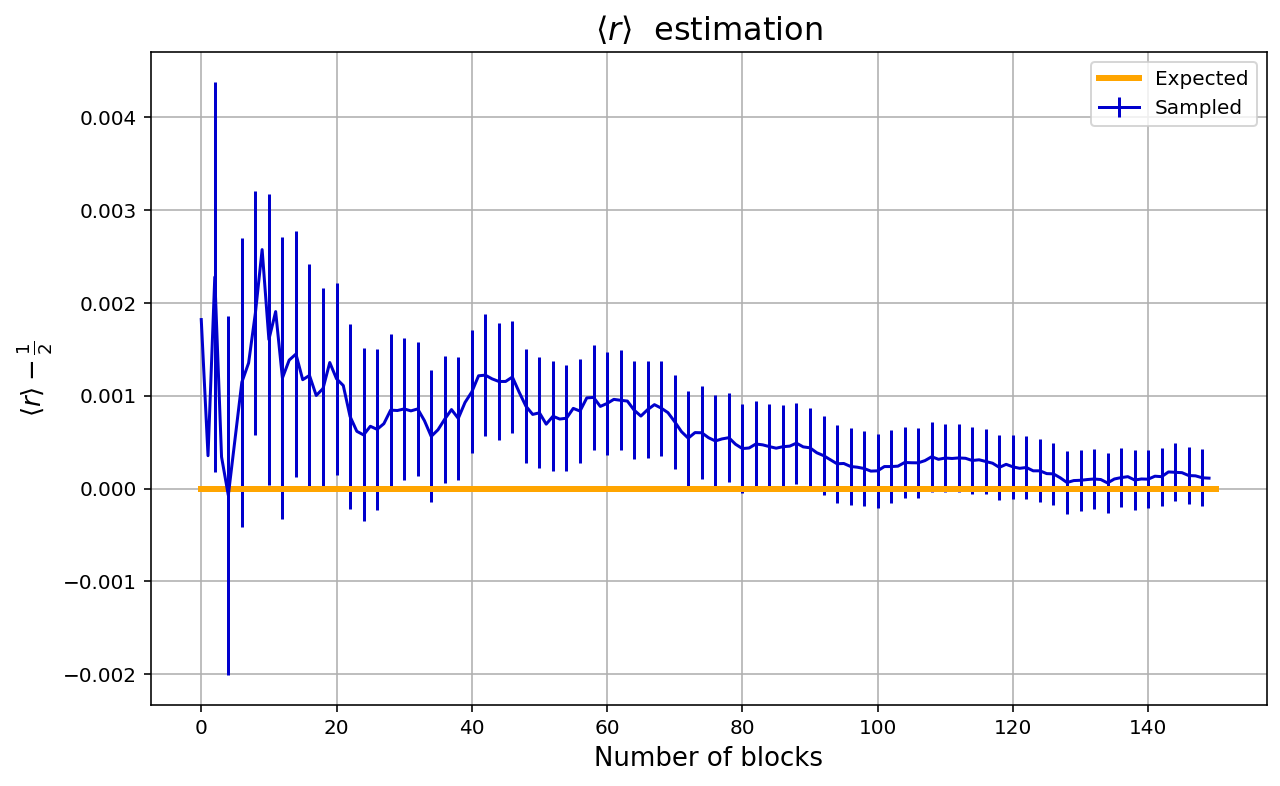

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = 'retina'

N=150
M=1000000
L=int(M/N)
x = np.arange(N)
x*=L

plt.figure(figsize=(10,6))
f, error = np.loadtxt("./01.1/random_events.txt", usecols=(0,2), delimiter=' ', unpack='true')
plt.errorbar(x/L,f-0.5,yerr=error, color='mediumblue',errorevery=2, label='Sampled')
plt.plot([0, N], [0., 0.], color='orange', linewidth=3, label='Expected')
plt.title(r'$\langle r \rangle$  estimation',fontsize=16)
plt.xlabel('Number of blocks',fontsize=13)
plt.ylabel(r'$\langle r \rangle-\frac{1}{2}$',fontsize=13)
plt.legend()
plt.grid()
plt.show()

Sono state eseguite $M=1000000$ estrazioni suddivise in $N=150$ blocchi. Ho graficato l'andamento di questa media a cui ho sottratto $\frac{1}{2}$, ovvero il valore di aspettazione: la curva deve quindi convergere a zero. Ho potuto osservare che il valor medio della variabile estratta uniformemente tra 0 e 1, converge entro una deviazione standard dopo 100 blocchi.

Un'altro aspetto interessante da osservare è il diminuire dell'incertezza con l'aumentare del numero di blocchi. Infatti le barre di errore diminuiscono con l'aumentare del numero di variabili estratte, come ci si poteva aspettare.

2. $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$. Make a picture of the estimation of $\sigma^2$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle (r-1/2)^2 \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks,

Ho calcolo il valore della deviazione standard della media attraverso la media statistica: $\langle \sigma^2 \rangle = \frac{1}{M}\sum^{M}_{i=1}(r_i-\frac{1}{2})^2$ dove $r_i$ è ancora la variabile distribuita uniformemente tra 0 e 1.

Come al punto precedente, ho utilizzato il metodo del Data-Blocking. In particolare, ho implementato nella mia libreria una funzione "Errore" che restituisce la deviazione standard della media progressiva delle medie dei singoli blocchi. Questa funzione riceve in ingresso due vettori. Il primo vettore è il vettore contenente le medie $\langle r \rangle$ dei singoli blocchi. Il secondo vettore contiene invece le medie $\langle r^2 \rangle$ dei singoli blocchi. 

Questa funzione viene richiamata al termine di ogni singolo blocco $i$, dopo che sono stati aggiunti i valori $\langle r \rangle$ e  $\langle r^2 \rangle$ ai due vettori definiti: questo è stato possibile grazie al metodo push_back() già implementato nella libreria <font color="red"> vector </font>.

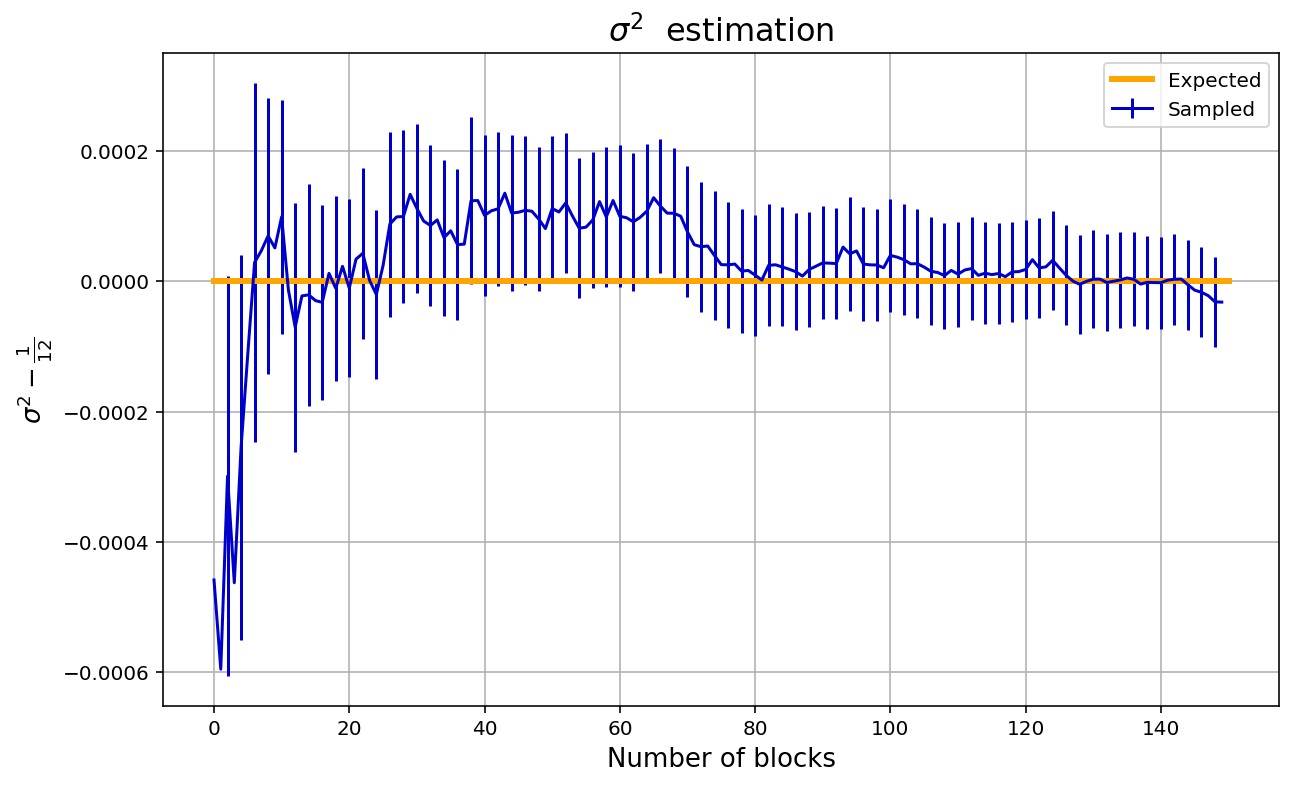

In [2]:
plt.figure(figsize=(10,6))
F, error = np.loadtxt("./01.1/random_events_2.txt", usecols=(0,2), delimiter=' ', unpack='true')
plt.errorbar(x/L,F-1/12,yerr=error, color='mediumblue',errorevery=2, label='Sampled')
plt.plot([0, N], [0., 0.], color='orange', linewidth=3, label='Expected')
plt.title(r'$\sigma^2$  estimation',fontsize=16)
plt.xlabel('Number of blocks',fontsize=13)
plt.ylabel(r'$\sigma^2 -\frac{1}{12}$',fontsize=13)
plt.grid(True)
plt.legend()
plt.show()

Ho riportato nel grafico il valore $\sigma^2$ a cui ho sottratto $\frac{1}{12}$ che è il suo valore di aspettazione. Anche in questo caso è possibile osservare un coorretto funzionamento del generatore di numeri pseduo-casuali. Il valore di $\sigma^2$ inizia a covergere entro una deviazione standard dopo appena 70 blocchi.

3. Divide $[0,1]$ into $M$ identical sub-intervals and implement the $\chi^2$ test. Obviously, the number of expected events observed in each sub-interval after $n$ *throws*, according to a uniform distribution, is $np = n\times 1/M= n/M$. Fix $M=10^2$ and use for $n$ the first $10^4$ pseudo-random numbers, then the successive $10^4$ pseudo-random numbers, and so on ... 100 times.Plot $\chi^2_j$ for $j=1, ..., 100$. In this case the chi-square statistic is:
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$

Da ultimo ho effettuato il test del $\chi^2$ per verificare se l'ipotesi di numeri uniformemente estratti tra 0 e 1 potesse essere accettata o rigettata. Per effettuare questo test ho suddiviso l'intervallo [0,1] in $M$ intervalli più piccoli di equa grandezza. Sono stati estratti $n$ numeri casuali. Ho verificato per ciascun numero a quale intervallo appartenesse, andando così ad aumentare di una unità il conteggio di quell'intervallo.

Nell'ipotesi di numeri uniformemente estratti tra 0 e 1, il numero di eventi attesi per ciascuno degli $M$ intervalli è evidentemente $\frac{n}{M}$. Il numero di eventi osservati è invece $n_i$ che è il numero di conteggi per ogni intervallo al termine delle n estrazioni. Ho ripetuto il test del $\chi^2$ indipendentemente 100 volte. Ho riportato nello scatterplot sottostante i risultati ottenuti.

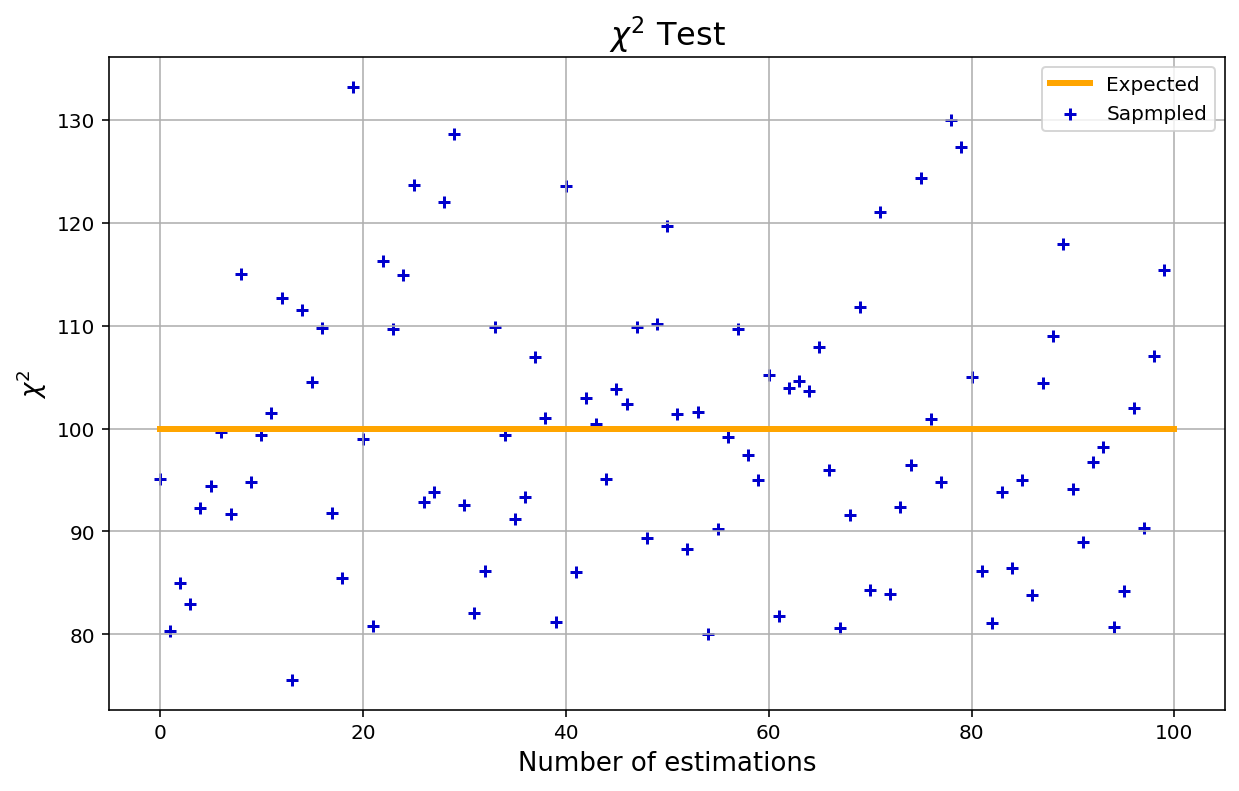

In [3]:
plt.figure(figsize=(10,6))
x=np.arange(100)
Chi_2 = np.loadtxt("./01.1/chi_2.txt", usecols=(0), unpack='true')
plt.scatter(x,Chi_2, color='mediumblue', label='Sapmpled', marker='+')
plt.plot([0, 100], [100, 100], color='orange', linewidth=3, label='Expected')
plt.title(r'$\chi^2$ Test', fontsize=16)
plt.xlabel('Number of estimations', fontsize=13)
plt.ylabel(r'$\chi^2$', fontsize=13)
plt.grid(True)
plt.legend()
plt.show()

Il valore atteso per il $\chi^2$ è 100. Questo è dovuto al fatto che ogni termine della sommatoria è semplicemente pari a 1. Infatti $(n_i - \frac{n}{M})^2  \simeq \frac{n}{M}$, e siccome questo numero è a sua volta diviso per il valore di aspettazione $\frac{n}{M}$, ogni termine della sommatoria è 1.

Nello scatterplot che ho riportato si può osservare come i valori del $\chi^2$ ottenuti siano distribuiti uniformemente intorno a 100. Pertanto è possibile accettare la mia ipotesi che i numeri da me estratti siano effettivamente numeri uniformemente distribuiti tra 0 e 1.

### Esercizio 1.2

- Extend Pseudo-Random Number generator downloaded from the NSL Ariel web site and check the Central Limit Theorem:
1. Add two probability distributions by using the method of the inversion of the cumulative distribution to sample from a generic exponential distribution, $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$, and a generic Cauchy-Lorentz distribution $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$.
2. Make 3 pictures with the histograms obtained filling them with $10^4$ realizations of $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$), being $x_i$ a random variable sampled throwing a *standard* dice (fig.1), an *exponential* dice (fig.2, use $\lambda=1$) and a *Lorentzian* dice (fig.3, use $\mu=0$ and $\Gamma=1$).

Note tha you can try to fit the case $N=100$ with a Gaussian for standard and exponential dices, whereas you should use a Cauchy-Lorentz distribution for the last case.

Il metodo dell'inversione della cumulativa è un metodo utilizzato per campionare alcune distribuzioni di probabilità $p(x)$ partendo semplicemente da numeri uniformemente distribuiti tra 0 e 1. Questo metodo consiste nell'essere in grado di invertire la funzione cumulativa definita come: $$ F(x) = \int^x_{-\infty} p(x')dx'$$

1. Se si prende ad esempio la distribuzione esponenziale $p(x)=\lambda e^{-\lambda x}$ nell'interallo $[0, \infty]$ si ha che:
$$F(x)= \int^x_{-\infty} p(x')dx'= - e^{- \lambda x} \rvert^{\infty}_0 = -e^{-\lambda x} +1$$
Preso $F(x)=r \in [0,1]$ uniformemente distribuito si ha quindi che: $$x=-\frac{1}{\lambda} ln(1-r)$$

2. Un secondo esempio è la distribuzione lorentziana: $p(x)=\frac{1}{\pi}\frac{\Gamma}{x^2+\Gamma^2}$. Anche in questo caso è stato possibile andare a invertire la funzione cumulativa potendo così ottenere che: $$ x=\Gamma \tan[\pi(r-\frac{1}{2})] \qquad r \in [0,1] \mbox{ uniforme}$$

Il metodo della cumulativa è uno strumento molto potente per il campionamento di distribuzione di probabilità. a patto però di riuscire a invertire la funzione cumulativa. Anche se in linea generale l'inversione non è facile, è possibile effettuarla per questo tipo di distribuzioni.

I metodi per il campionamento con distribuzioni di probabilità gaussiana, di Cauchy ed esponenziale sono state da me implementate all'interno della classe `Random` per un possibile utilizzo anche nelle future esercitazioni.

Ho a questo punto riportato i grafici delle realizzazione di $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (per $N=1, 2, 10, 100$), con $x_i$ variabile random distribuita con una distribuzione esponenziale, poi con una distribuzione di Cauchy-Lorentz e infine con una distribuzione uniforme.


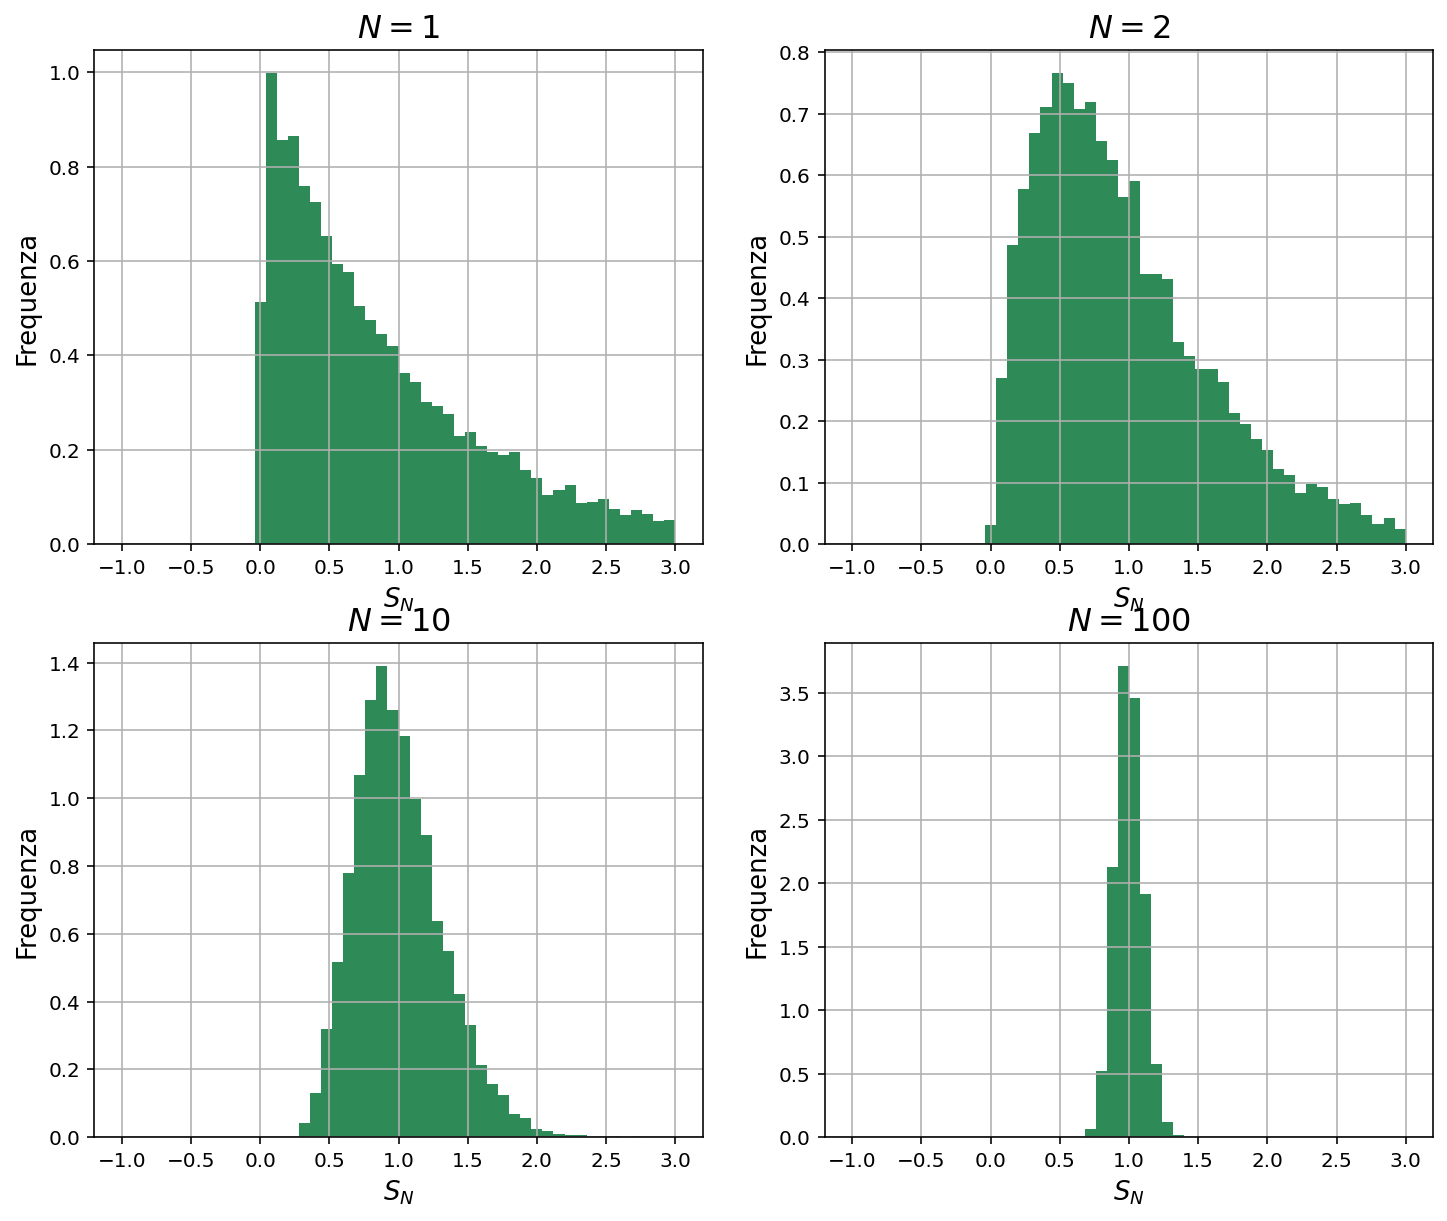

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit

S_n1, S_n2, S_n10, S_n100 = np.loadtxt("./01.2/exp_central_theorem.txt", usecols=(0,1,2,3), delimiter=" ", unpack='true')
n_bins=50



fig, axs = plt.subplots(2, 2, figsize=(12,10))
x = np.arange(150)

axs[0,0].set_title(r'$N=1$', fontsize=16)
axs[0,0].hist(S_n1, n_bins, range=(-1,3), density=True, color='seagreen')

axs[0,1].set_title(r'$N=2$', fontsize=16)
axs[0,1].hist(S_n2, n_bins, range=(-1,3), density=True, color='seagreen')


axs[1,0].set_title(r'$N=10$', fontsize=16)
axs[1,0].hist(S_n10, n_bins, range=(-1,3), density=True, color='seagreen')

axs[1,1].set_title(r'$N=100$', fontsize=16)
axs[1,1].hist(S_n100, n_bins, range=(-1,3), density=True, color='seagreen')


for ax in axs.flat:
    ax.grid()
    ax.set_xlabel(r'$S_N$', fontsize=13)
    ax.set_ylabel('Frequenza', fontsize=13)

hist_exp, bins_exp=np.histogram(S_n100, n_bins, density=True)
S_n100_exp=S_n100

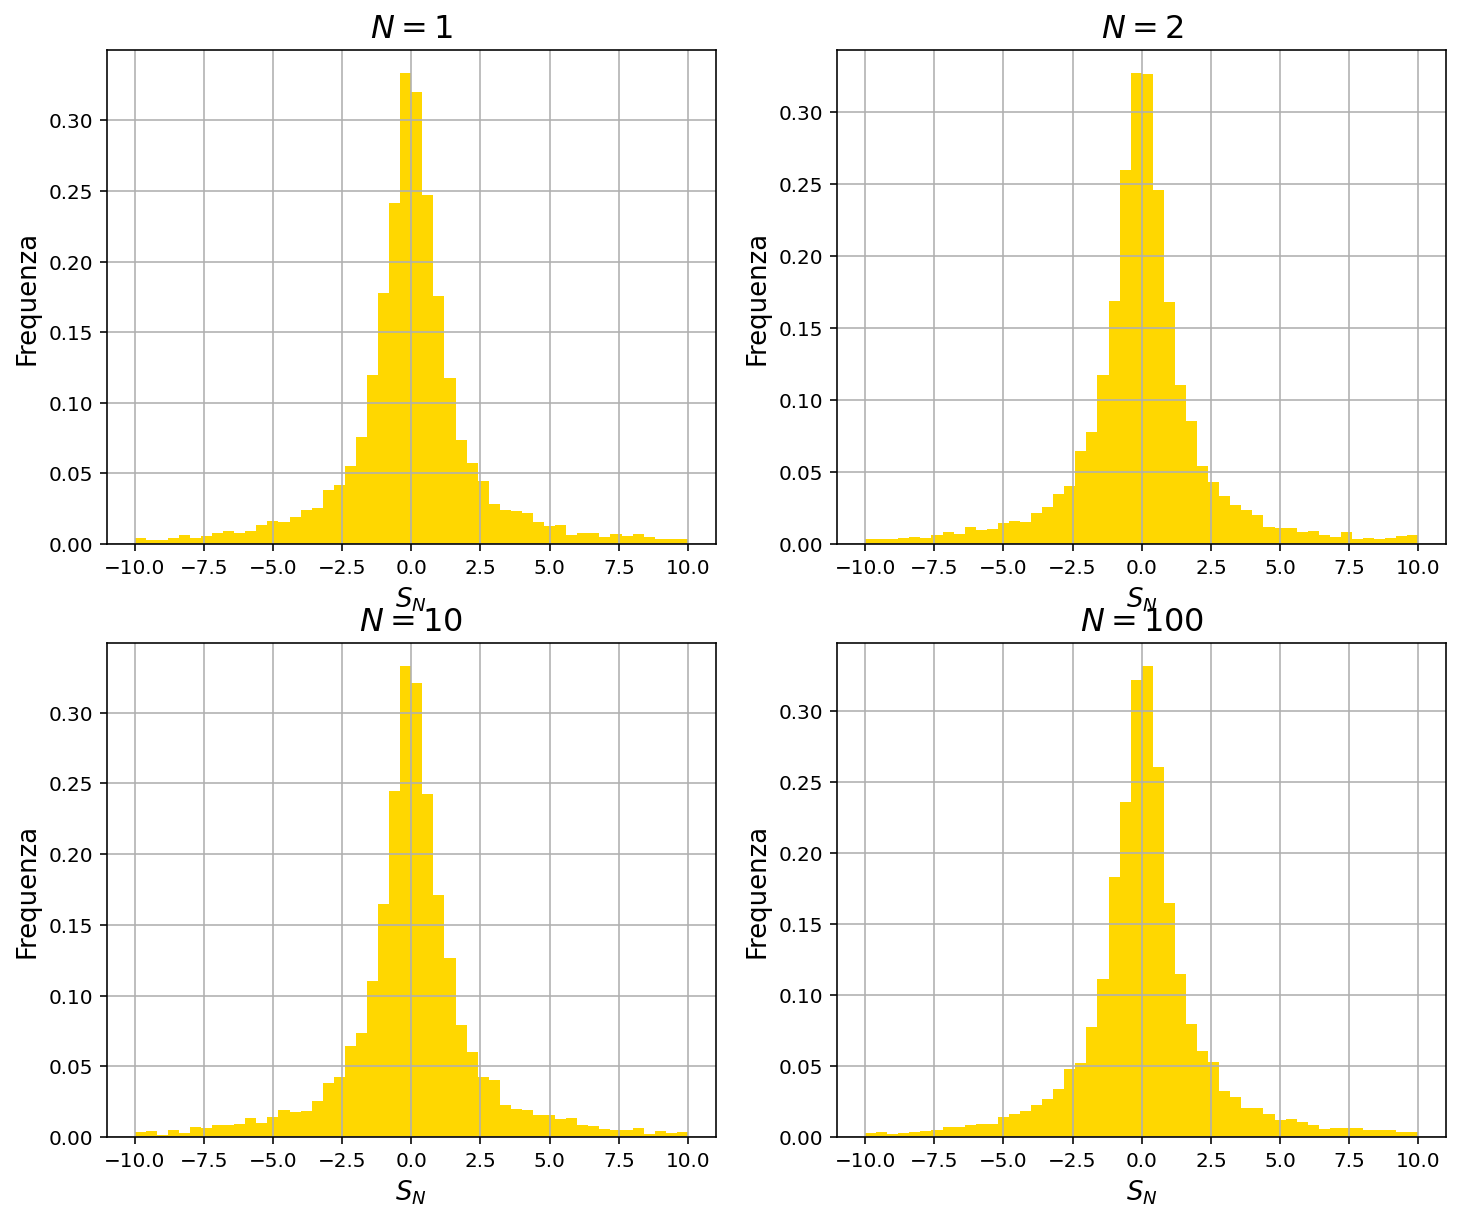

In [5]:
S_n1, S_n2, S_n10, S_n100 = np.loadtxt("./01.2/lor_central_theorem.txt", usecols=(0,1,2,3), delimiter=" ", unpack='true')
n_bins=50



fig, axs = plt.subplots(2, 2, figsize=(12,10))
x = np.arange(150)

axs[0,0].set_title(r'$N=1$', fontsize=16)
axs[0,0].hist(S_n1, n_bins, range=(-10,10), density=True, color='gold')

axs[0,1].set_title(r'$N=2$', fontsize=16)
axs[0,1].hist(S_n2, n_bins, range=(-10,10), density=True, color='gold')


axs[1,0].set_title(r'$N=10$', fontsize=16)
axs[1,0].hist(S_n10, n_bins, range=(-10,10), density=True, color='gold')

axs[1,1].set_title(r'$N=100$', fontsize=16)
axs[1,1].hist(S_n100, n_bins, range=(-10,10), density=True, color='gold')


for ax in axs.flat:
    ax.grid()
    ax.set_xlabel(r'$S_N$', fontsize=13)
    ax.set_ylabel('Frequenza', fontsize=13)

hist_lor, bins_lor=np.histogram(S_n100, n_bins, density=True,range=(-10,10))
S_n100_lor=S_n100

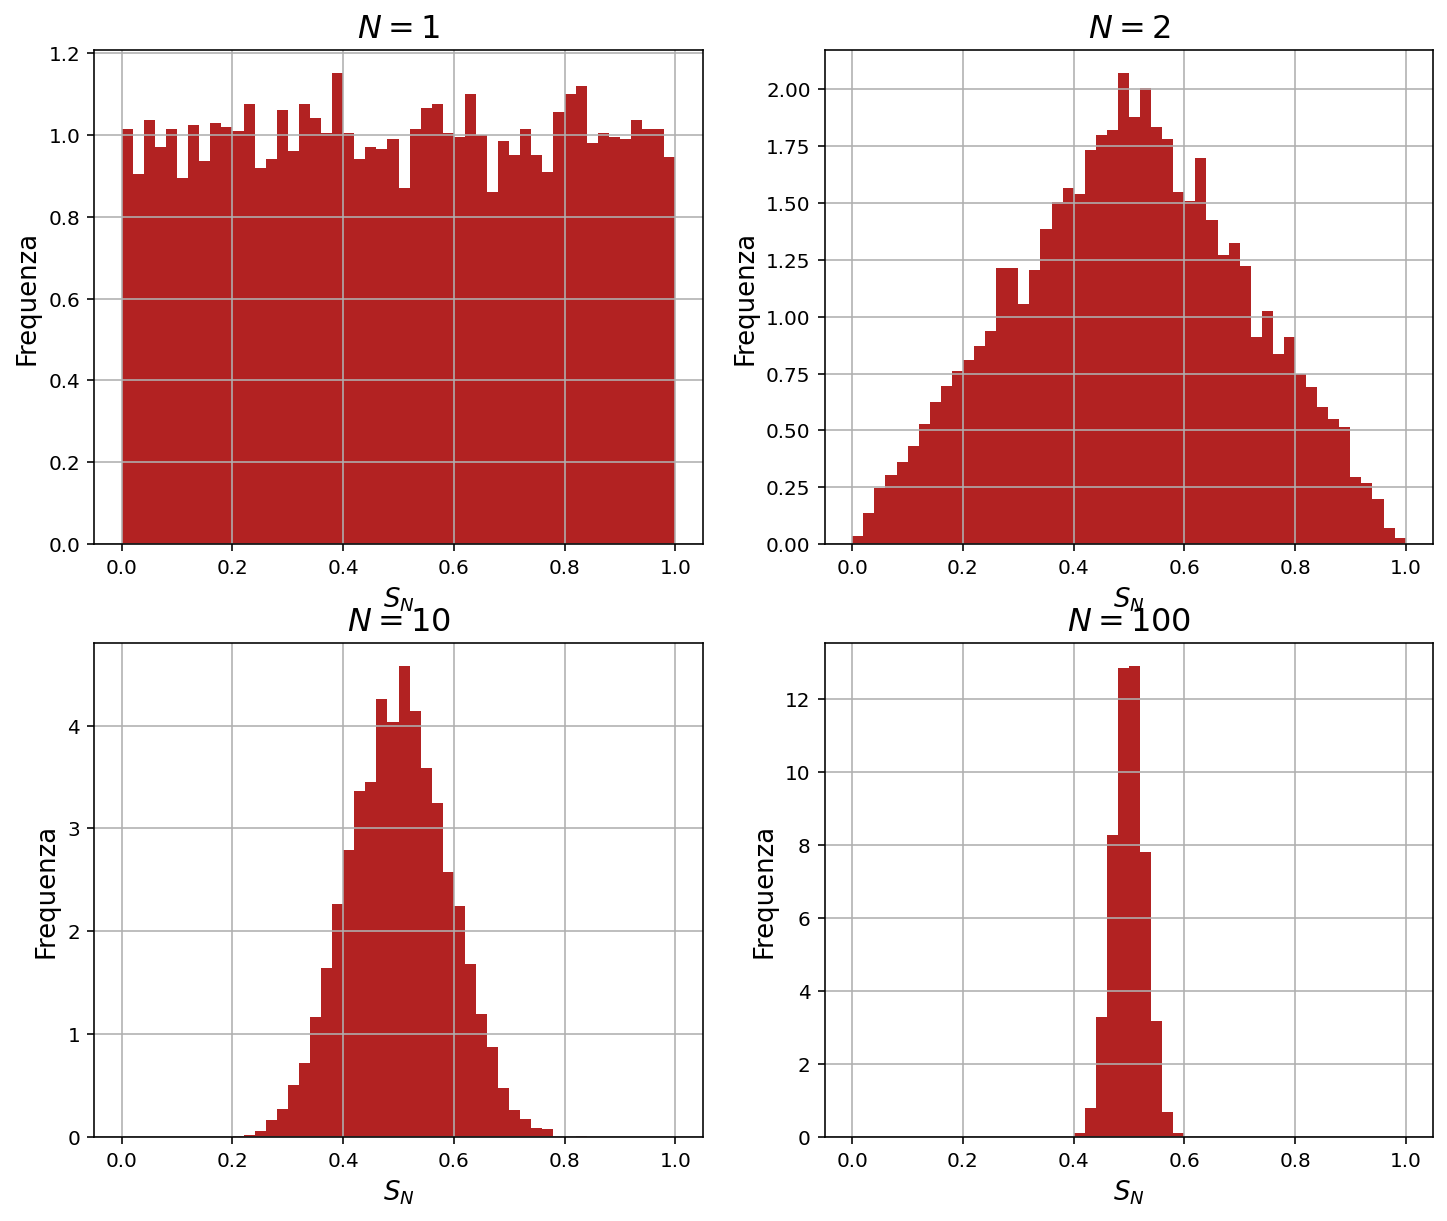

In [6]:
S_n1, S_n2, S_n10, S_n100 = np.loadtxt("./01.2/dice_central_theorem.txt", usecols=(0,1,2,3), delimiter=" ", unpack='true')
n_bins=50



fig, axs = plt.subplots(2, 2, figsize=(12,10))
x = np.arange(150)

axs[0,0].set_title(r'$N=1$', fontsize=16)
axs[0,0].hist(S_n1, n_bins, range=(0,1), density=True, color='firebrick')

axs[0,1].set_title(r'$N=2$', fontsize=16)
axs[0,1].hist(S_n2, n_bins, range=(0,1), density=True, color='firebrick')


axs[1,0].set_title(r'$N=10$', fontsize=16)
axs[1,0].hist(S_n10, n_bins, range=(0,1), density=True, color='firebrick')

axs[1,1].set_title(r'$N=100$', fontsize=16)
axs[1,1].hist(S_n100, n_bins, range=(0,1), density=True, color='firebrick')


for ax in axs.flat:
    ax.grid()
    ax.set_xlabel(r'$S_N$', fontsize=13)
    ax.set_ylabel('Frequenza', fontsize=13)
    
S_n100_dice=S_n100    
hist_dice, bins_dice=np.histogram(S_n100, n_bins, density=True)

Parametri del fit per N=100 esponenziale: mu = 0.995 sigma = 49.638
Parametri del fit per N=100 Lorentziana: mu = 0.021 gamma = 0.939
Parametri del fit per N=100 uniforme: mu = 0.499 sigma = 601.0


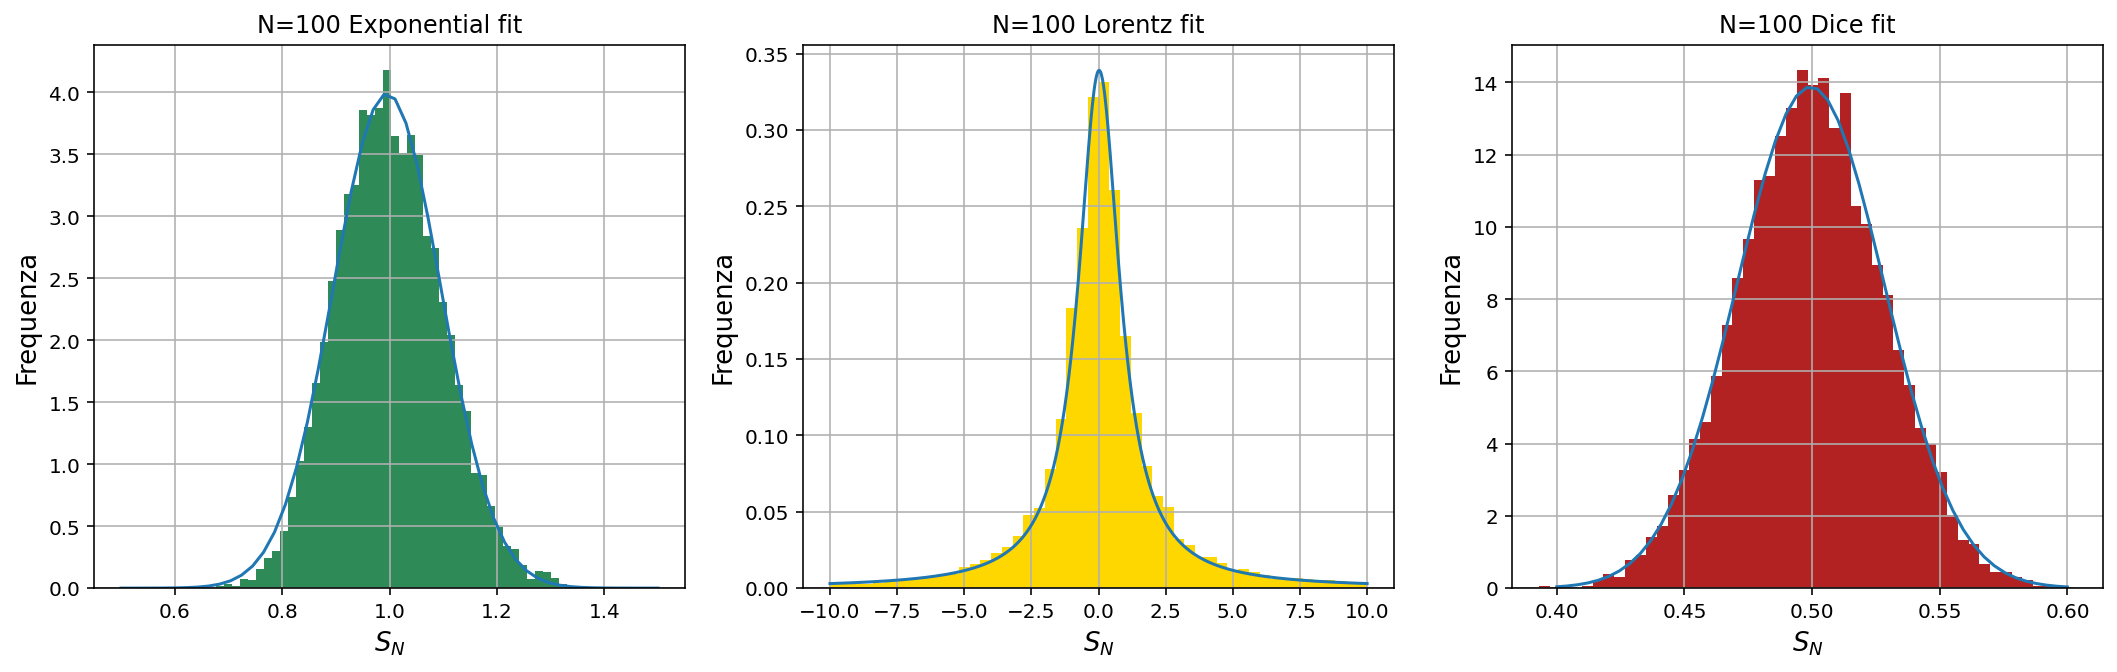

In [7]:
def f_cau(x,a,b):  # defining the Cauchy fitting function
    return a/(math.pi*((x-b)*(x-b)+a*a))

def f_gauss(x,a,b,c):  # defining the Gauss fitting function
    return a * np.exp(-b*(x-c)**2)

fig, axs = plt.subplots(1, 3, figsize=(18,5))

# Fit for exponential
axs[0].hist(S_n100_exp, n_bins, density=True, color='seagreen')
axs[0].set_title('N=100 Exponential fit')
valore_exp=bins_exp[1]-bins_exp[0]
bins_exp= bins_exp[:-1] +valore_exp/2 #ho messo valore/2 pechè prende il valor medio e non l'inizio
popt_exp, pcov_exp = curve_fit(f_gauss, bins_exp, hist_exp)
print('Parametri del fit per N=100 esponenziale: mu = ' +str(round(popt_exp[2],3)) + ' sigma = ' + str(round(popt_exp[1],3)))
x_exp=np.linspace(0.5,1.5)
y_fit_exp = f_gauss(x_exp,popt_exp[0],popt_exp[1],popt_exp[2])
axs[0].plot(x_exp,y_fit_exp) # plotting fitted function

# Fit for Lorentz
valore_lor=bins_lor[1]-bins_lor[0]
bins_lor= bins_lor[:-1] +valore_lor/2
axs[1].hist(S_n100_lor, n_bins, density=True, range=(-10,10), color='gold')
axs[1].set_title('N=100 Lorentz fit')
popt_lor, pcov_lor = curve_fit(f_cau, bins_lor, hist_lor,bounds=([0.5,-0.1],[1.5,0.1]))
print('Parametri del fit per N=100 Lorentziana: mu = ' +str(round(popt_lor[1],3)) + ' gamma = ' + str(round(popt_lor[0],3)))
x_lor=np.linspace(-10,10, num=1000)
y_fit_lor = f_cau(x_lor,popt_lor[0],popt_lor[1])
axs[1].plot(x_lor,y_fit_lor) # plotting fitted function


#Fit for uniform
axs[2].hist(S_n100_dice, n_bins, density=True, color='firebrick')
axs[2].set_title('N=100 Dice fit')
valore_dice=bins_dice[1]-bins_dice[0]
bins_dice= bins_dice[:-1] +valore_dice/2 #ho messo valore/2 pechè prende il valor medio e non l'inizio
popt_dice, pcov_dice = curve_fit(f_gauss, bins_dice, hist_dice, bounds=([13,600,0.49],[14,601,0.5]))
print('Parametri del fit per N=100 uniforme: mu = ' +str(round(popt_dice[2],3)) + ' sigma = ' + str(round(popt_dice[1])))
x_dice=np.linspace(0.4,0.6)
y_fit_dice = f_gauss(x_dice,popt_dice[0],popt_dice[1],popt_dice[2])
axs[2].plot(x_dice,y_fit_dice) # plotting fitted function

for ax in axs.flat:
    ax.grid()
    ax.set_xlabel(r'$S_N$', fontsize=13)
    ax.set_ylabel('Frequenza', fontsize=13)

Ho riportato quì sopra gli istogrammi delle $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ con $N=100$ con $x_i$ distribuiti rispettivamente secondo distribuzione esponenziale, di Cauchy-Lorentz e infine uniforme.

Questi istogrammi sono un'interessante prova del <font color="red"> Teorema del Limite Centrake </font>: la somma di $N$ variabili $x_i$ random indipendenti e distribuite in modo identico obbedisce alla distribuzione gaussiana nel limite di $ N\to \infty$ se il primo e il secondo momento della variabile $x$ non divergono.

In effetti si può notare che la distribuzione uniforme e la distribuzione esponenziale convergono a una gaussiana con l'aumentare di $N$. Per entrambe sono andato ad effettuare un fit con una funzione gaussiana e ho stampato i valori della media $\mu$ e varianza $\sigma$ per entrambe le gaussiane che approssimano le due distribuzioni di probabilità.

Diverso è invece il discorso per la distribuzione di probabilità di Cauchy-Lorentz. Questa distribuzione di probabilità ha una varianza non fissata, pertanto crollano le ipotesi del teorema del limite centrale: la funzione $S_N$ non tende a una Gaussiana. Tuttavia, ricordo che la funzione di cauchy-Lorentz è un punto fisso nello spazio delle distribuzioni di probabilità: per questa ragione non mi stupisce che la funzione $S_N$ di una distribuzione di Cauchy-Lorentz converga a sua volta a una funzione di Cauchy-Lorentz.
Anche per questa distribuzione di probabilità sono andato ad effettuare un fit con una funzione di Cauchy-Lorentz e ho stampato i valori di media e gamma.

### Esercizio 1.3

- Simulate the Buffon’s experiment.  A needle of length $L$ is thrown at random onto a horizontal plane ruled with straight lines a distance $d$ (must be $d > L$, but do not use $d\gg L$ otherwise $P\ll 1$) apart. The probability $P$ that the needle will intersect one of these lines is: $P = 2L/\pi d$. This could be used to evaluate $\pi$ from throws of the needle: if the needle is thrown down $N_{thr}$ times and is observed to land on a line $N_{hit}$ of those times, we can make an estimate of $\pi$ from
$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$
Make a picture of the estimation of $\pi$ and its uncertainty (Standard Deviation of the mean) with a large number of *throws* $M$ as a function of the number of blocks, $N$ (see below: Computing statistical uncertainties). If possible, do not use $\pi$ to evaluate $\pi$.

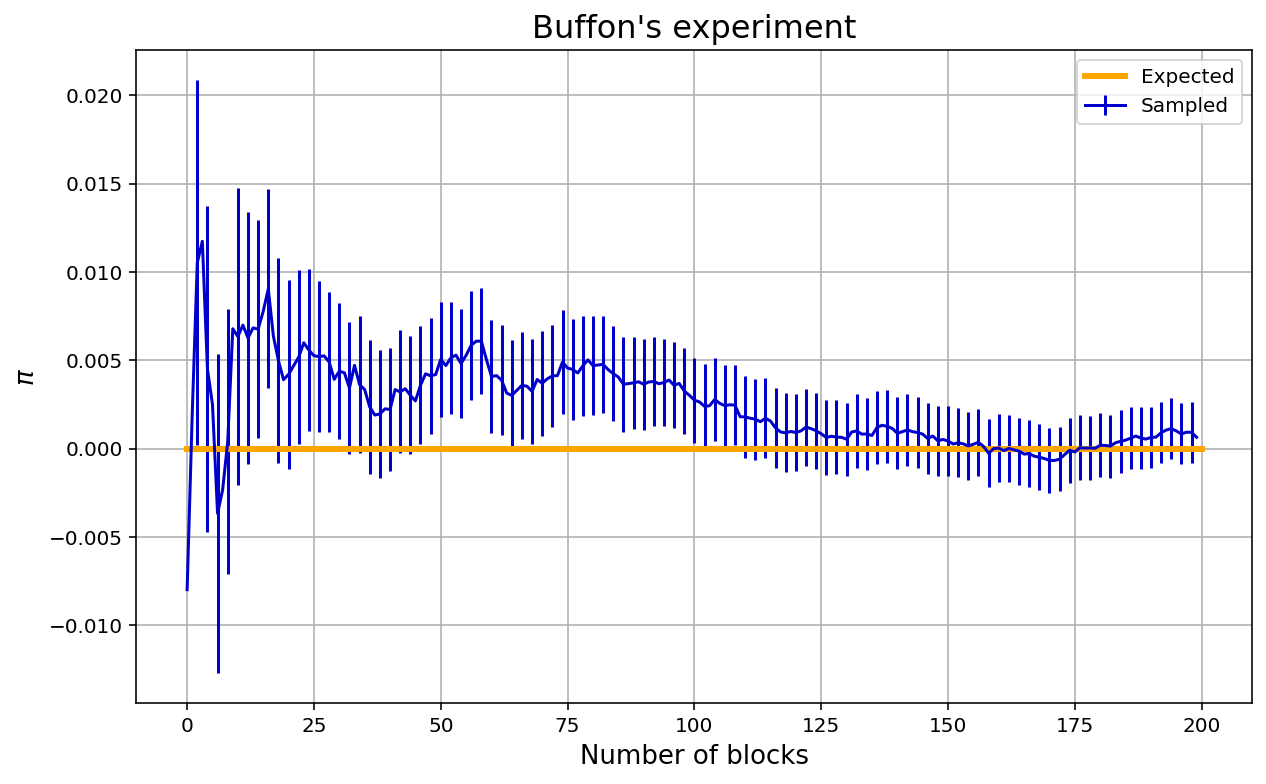

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy.optimize import curve_fit

pi, error = np.loadtxt("./01.3/pi.txt", usecols=(0,2), delimiter=' ', unpack='true')
N=200
M=3000000
L=int(M/N)

x = np.arange(N)
x*=L

plt.figure(figsize=(10,6))
plt.errorbar(x/L,pi-math.pi,yerr=error,color='mediumblue',errorevery=2, label='Sampled')
plt.plot([0, N], [0., 0.], color='orange', linewidth=3, label='Expected')
plt.title("Buffon's experiment", fontsize=16)
plt.xlabel('Number of blocks', fontsize=13)
plt.ylabel(r'$\pi$',  fontsize=13)
plt.legend()
plt.grid()
plt.show()

Come da richiesta dell'esercizio ho simulato l'esperimento di Buffon. Quello che semplicemente ho fatto è stato considerare due righe dritte a distanza $d=1.2$. Ho immaginato di avere un ago di lunghezza $L=1$ e per un numero di volte pari a $3 \cdot 10^6$ ho estratto con una ditribuzione uniforme una variabile $y \in [0,1]$. Questa variabile rappresenta quindi il baricentro del mio ago.

Ho estratto quindi una variabile casuale $\theta \in [0,\pi]$ in modo da rappresentare l'inclinazione dell'ago. Allora:
- Se $h=y*d+L*\theta*0.5 > d$ oppure se $h=y*d+L*\theta*0.5 < 0$ vuol dire che l'ago ha intercettato una delle due righe dritte. Allora in questo caso venivano incrementate di una unità sia la variabile ${N_tot}$ che la variabile $N_{hit}$.
- Altrimenti veniva incrementata di una unità solamente la variabile ${N_{tot}}$.

Al termine delle $3 \cdot 10^6$ estrazioni ho potuto valutare il valore di $\pi$ come:
$$\pi \frac{2LN_{thr}}{N_{hit}d}$$

Anche in questo caso ho utilizzato il metodo di Data Blocking per campionare il valore di $\pi$.

<font color="red"> N.B. </font> Il modo che ho utilizzato per campionare $\theta \in [0,\pi]$ senza l'ulizzo di $\pi$ è stato il seguente:

Ho estratto due numeri causali $x_1, x_2 \in [0,1]$. Ho valutato la radice quadrata di queste due variabili:
- Se $\sqrt{x_1^2 + x_2^2} < 1$ allora restituivo $2*atan(\frac{x_1}{x_2})$
- Altrimenti estraevo nuovamente x_1 e x_2

Nel mio esperimento ho diviso le $3 \cdot 10^6$ estrazioni in $200$ blocchi e ho riportato l'andamento della media di $\pi$ in funzione del numero dei blocchi.